In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
devices = ["Johannesburg", "Singapore", "Melbourne", "Yorktown", "Valencia"]
filenames = ["results/" + d + "_pauliopt.csv" for d in devices]

In [3]:
dfs = []
for f in filenames:
    dfs.append(pd.read_csv(f))
df = pd.concat(dfs, axis=0)

In [4]:
rename = {c: "time"+c[:-len(" time")] for c in df.columns if c.endswith("time")}
df.rename(columns=rename, inplace=True)

The circuits compiled without permuting and with reverse traversal have the runtimes multiplied by 10.

In [6]:
for col in df.columns:
    if "time" in col and col.endswith("False+RT"):
        df[col] = df[col]/10

In [7]:
df["naive+best"] = df["naive+permrowcol+True+RT*anneal"]
df["timenaive+best"] = df["timenaive+permrowcol+True+RT*anneal"]

cols = ["paritysynth+permrowcol+True+RT", "paritysynth+naive+False+RT"]
df["ps+best"] = [df.iloc[i][c] for i,c in enumerate(df[cols].idxmin(axis=1))]
df["timeps+best"] = df["time"+cols[0]] + df["time"+cols[1]]

cols = ["steiner-graysynth+permrowcol+True+RT", "steiner-graysynth+naive+False+RT"]
df["sgs+best"] = [df.iloc[i][c] for i,c in enumerate(df[cols].idxmin(axis=1))]
df["timesgs+best"] = df["time"+cols[0]] + df["time"+cols[1]]

/var/folders/3q/vjbn2sl16r1g41lg5pk752khfzf5fm/T/ipykernel_63649/1678905088.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["naive+best"] = df["naive+permrowcol+True+RT*anneal"]
/var/folders/3q/vjbn2sl16r1g41lg5pk752khfzf5fm/T/ipykernel_63649/1678905088.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["timenaive+best"] = df["timenaive+permrowcol+True+RT*anneal"]
/var/folders/3q/vjbn2sl16r1g41lg5pk752khfzf5fm/T/ipykernel_63649/1678905088.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

In [12]:
new_df = df.groupby(["device", "gadget"]).mean()
df_min = df.groupby(["device", "gadget"]).min()
df_max = df.groupby(["device", "gadget"]).max()
df_var = df.groupby(["device", "gadget"]).std()
df_var.head(20)

original      qiskit  timeqiskit        tket  timetket  \
device       gadget                                                            
Johannesburg 1        5.409556   12.609621    0.065088   12.550758  0.322502   
             2        8.386849   18.124394    0.205553   16.033272  0.415268   
             5       14.724388   28.494945    0.641669   24.174458  0.639885   
             10      19.238000   37.291870    1.276495   27.569004  1.001197   
             50      33.926568   74.069741    3.595471   68.666153  2.727768   
             100     54.437492  114.993351    6.100336  121.412983  5.576322   
Melbourne    1        4.194556    8.296560    0.040159    7.925244  0.177078   
             2        6.145854   10.290642    0.116063    9.663639  0.231984   
             5        9.268976   18.745717    0.336710   14.882828  0.374043   
             10      14.512129   27.327410    0.677455   20.344439  0.538760   
             50      30.525150   58.726106    1.327424   49.077251  1.443368   
             100     46.064347   77.307278    4.583024   68.788315  1.805099   
Singapore    1        5.771547   12.198873    0.063412   11.634131  0.295869   
             2        9.268669   17.897453    0.261737   16.503164  0.424544   
             5       13.938018   27.663436    0.681668   22.506114  0.627218   
             10      20.915684   37.712350    1.152500   29.131207  0.923144   
             50      44.240539   90.100081    3.089154   78.657074  2.793298   
             100     65.300043  127.281875    5.270996  130.823582  5.020134   
Valencia     1        2.425602    3.023510    0.018928    2.796896  0.077599   
             2        3.305538    4.439181    0.028474    3.324035  0.086379   

                        parity  timeparity  graysynth  timegraysynth  \
device       gadget                                                    
Johannesburg 1       20.252047    0.498580  15.853318       0.314515   
             2       53.456653    0.055306  41.667519       0.018945   
             5       76.472771    0.056811  67.606756       0.018466   
             10      57.578586    0.095311  62.692620       0.049569   
             50      46.403280    1.105186  55.620264       0.056552   
             100     64.933012    0.100543  76.119077       0.077453   
Melbourne    1       11.157893    0.534255  10.556389       0.499612   
             2       17.587467    0.015060  17.635869       0.005913   
             5       27.256677    0.032729  31.475840       0.009296   
             10      33.034674    0.036582  34.624194       0.018600   
             50      39.518845    1.130905  33.804267       0.041633   
             100     44.648371    0.055297  47.486039       0.051825   
Singapore    1       15.989316    0.514168  15.801698       0.359570   
             2       41.164497    0.052416  39.131875       0.010666   
             5       59.475917    0.059841  65.064281       0.031960   
             10      56.548982    0.105586  52.180236       0.029948   
             50      52.115743    1.055026  48.220812       0.063018   
             100     72.609150    0.093472  76.775143       0.067956   
Valencia     1        2.934302    0.554770   3.211899       0.286543   
             2        5.876781    0.001612   5.251266       0.001682   

                     steiner-graysynth+permrowcol+True+annealer  ...  \
device       gadget                                              ...   
Johannesburg 1                                        10.317246  ...   
             2                                        31.599461  ...   
             5                                        72.930302  ...   
             10                                       63.706601  ...   
             50                                       55.484283  ...   
             100                                      74.234729  ...   
Melbourne    1                                         7.323352  ...   
             2              

# Baseline differences

In [15]:
palette = ['#377eb8', '#ff7f00', '#4daf4a',
           '#f781bf', '#a65628', '#984ea3',
           '#999999', '#e41a1c', '#dede00']

In [18]:
device_sizes = {
    "Johannesburg": 20,
    "Melbourne": 14,
    "Singapore": 20,
    "Yorktown":5,
    "Valencia":5
}

def draw_results2(baselines, scale="linear"):# (% w.r.t. Original)"):
    fig, ax = plt.subplots(len(devices),2)
    fig.set_figwidth(2*6)
    fig.set_figheight(len(devices)*5)

    styles = {m:p for m, p in zip(baselines.values(), palette)}
    for i, device in enumerate(devices):
        for name, col in baselines.items():
            color=styles[col]
            y = new_df.loc[[(device,g) for g in gadgets]][col]
            y_var = df_var.loc[[(device,g) for g in gadgets]][col]
            ax[i, 0].fill_between(gadgets, y-y_var, y+y_var, alpha=.2, color=color)
            ax[i, 0].plot(gadgets, y, label=name, color=color)
            if col != "original":
                col = "time"+col
                y = new_df.loc[[(device,g) for g in gadgets]][col]
                y_var = df_var.loc[[(device,g) for g in gadgets]][col]
                ax[i,1].fill_between(gadgets, y-y_var, y+y_var, alpha=.2, color=color)
                if "min" in name:
                    name = name.replace("min(", "")
                    name = name.replace(")", "")
                    name = name.replace(",", " +")
                ax[i,1].plot(gadgets, y, label=name, color=color)
        for j in range(2):
            ax[i,j].legend()
            ax[i,j].set_title(device+f" ({device_sizes[device]} qubits)")
            ax[i,j].set_xlabel("Number of phase gadgets")
        ax[i,1].set_ylabel("Compiler runtime (s)")
        ax[i,1].set_yscale("log")
        ax[i,0].set_ylabel("Number of CNOTs")
        ax[i,0].set_yscale(scale)
    fig.show()

/var/folders/3q/vjbn2sl16r1g41lg5pk752khfzf5fm/T/ipykernel_63649/59124935.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


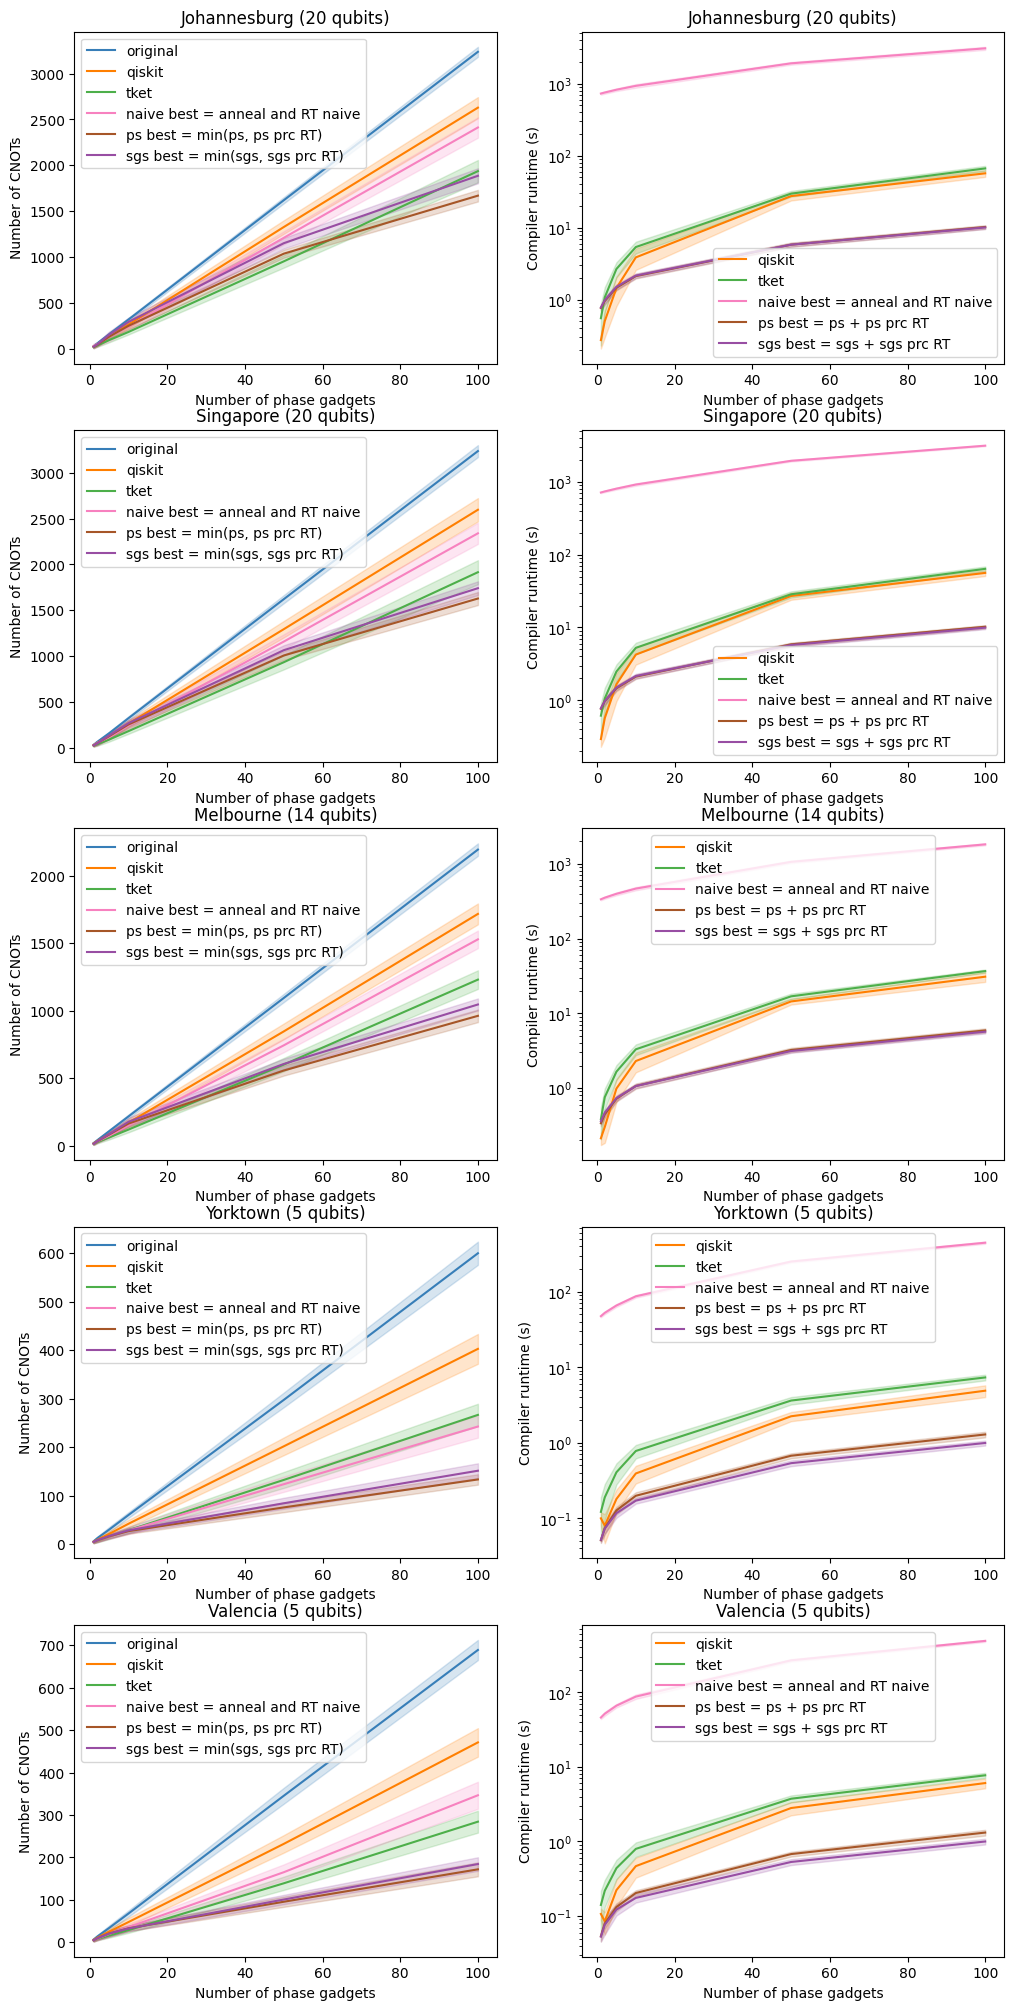

In [20]:
baselines1 = {
    "original": "original",
    "qiskit": "qiskit",
    "tket": "tket",
    "naive best = anneal and RT naive": "naive+best",
    "ps best = min(ps, ps prc RT)": "ps+best",
    "sgs best = min(sgs, sgs prc RT)": "sgs+best",
}
draw_results2(baselines1)

/var/folders/3q/vjbn2sl16r1g41lg5pk752khfzf5fm/T/ipykernel_5037/3594802256.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/3q/vjbn2sl16r1g41lg5pk752khfzf5fm/T/ipykernel_5037/3594802256.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


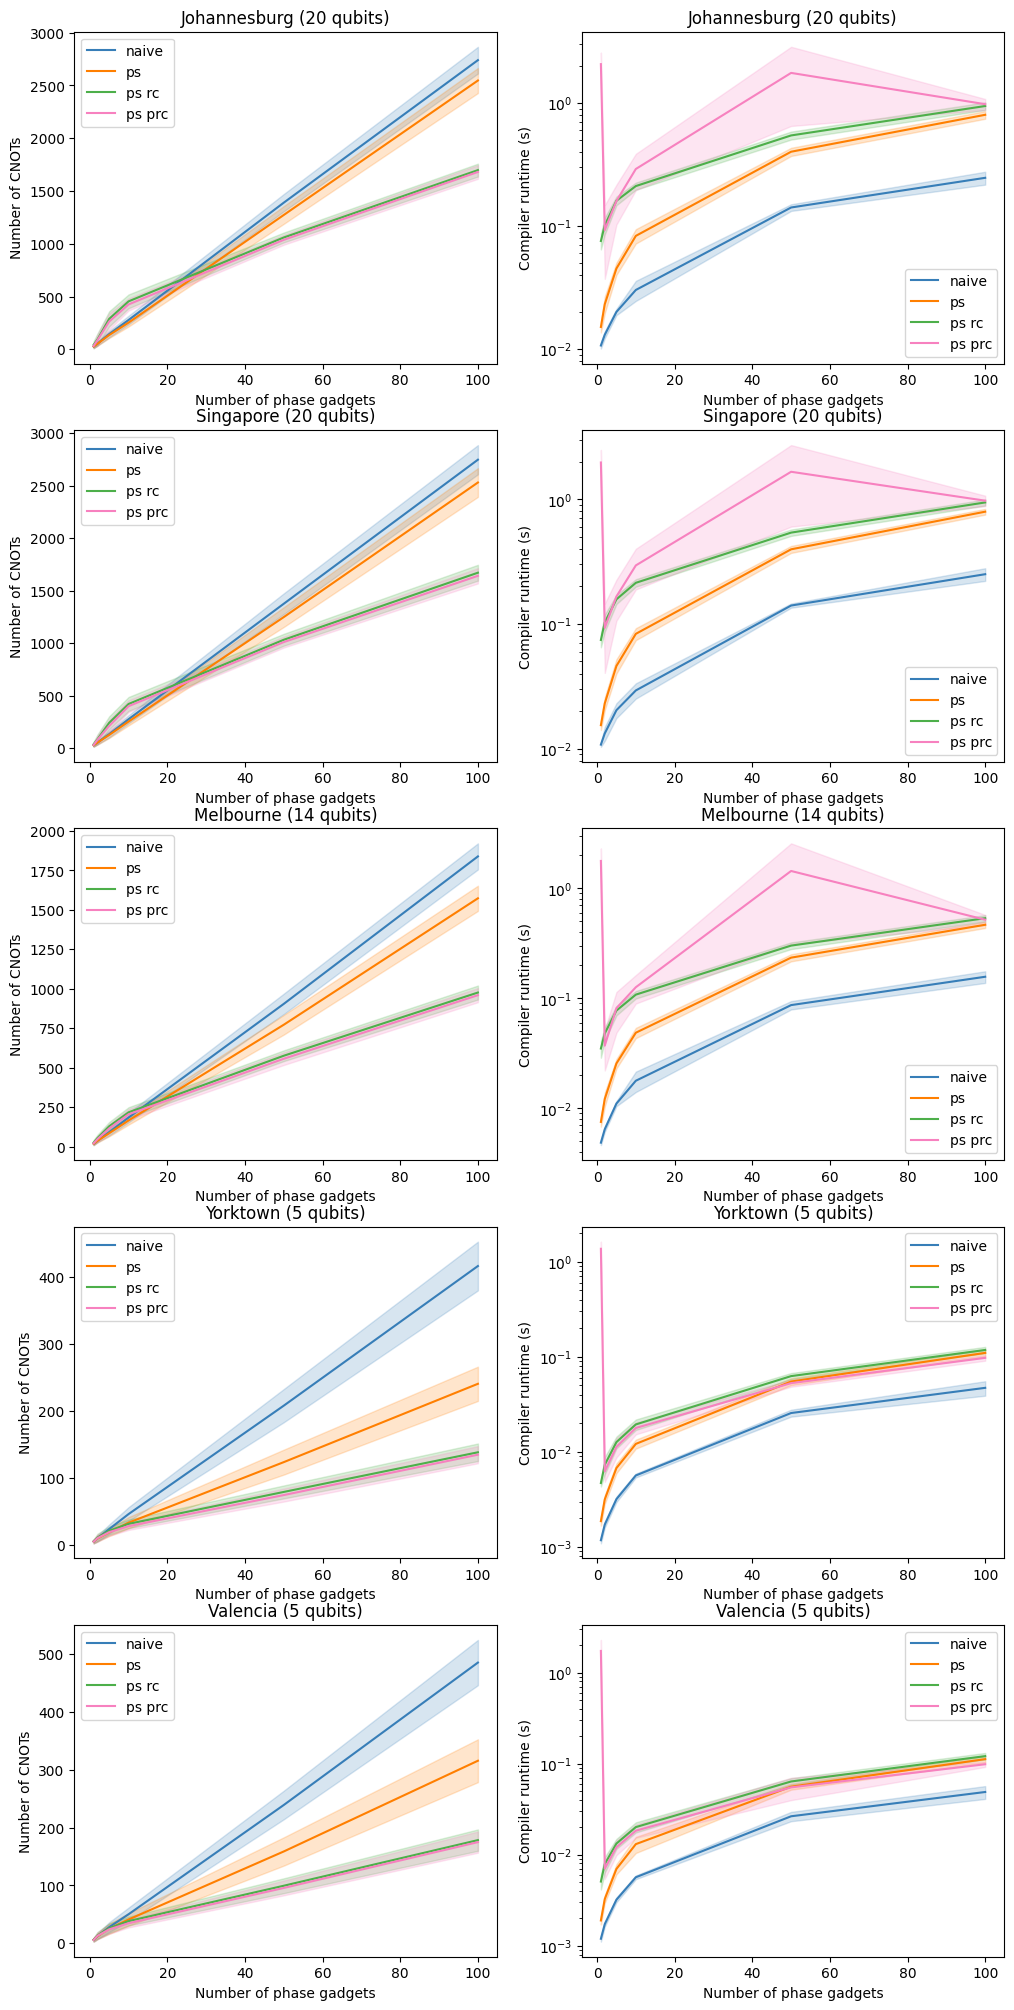

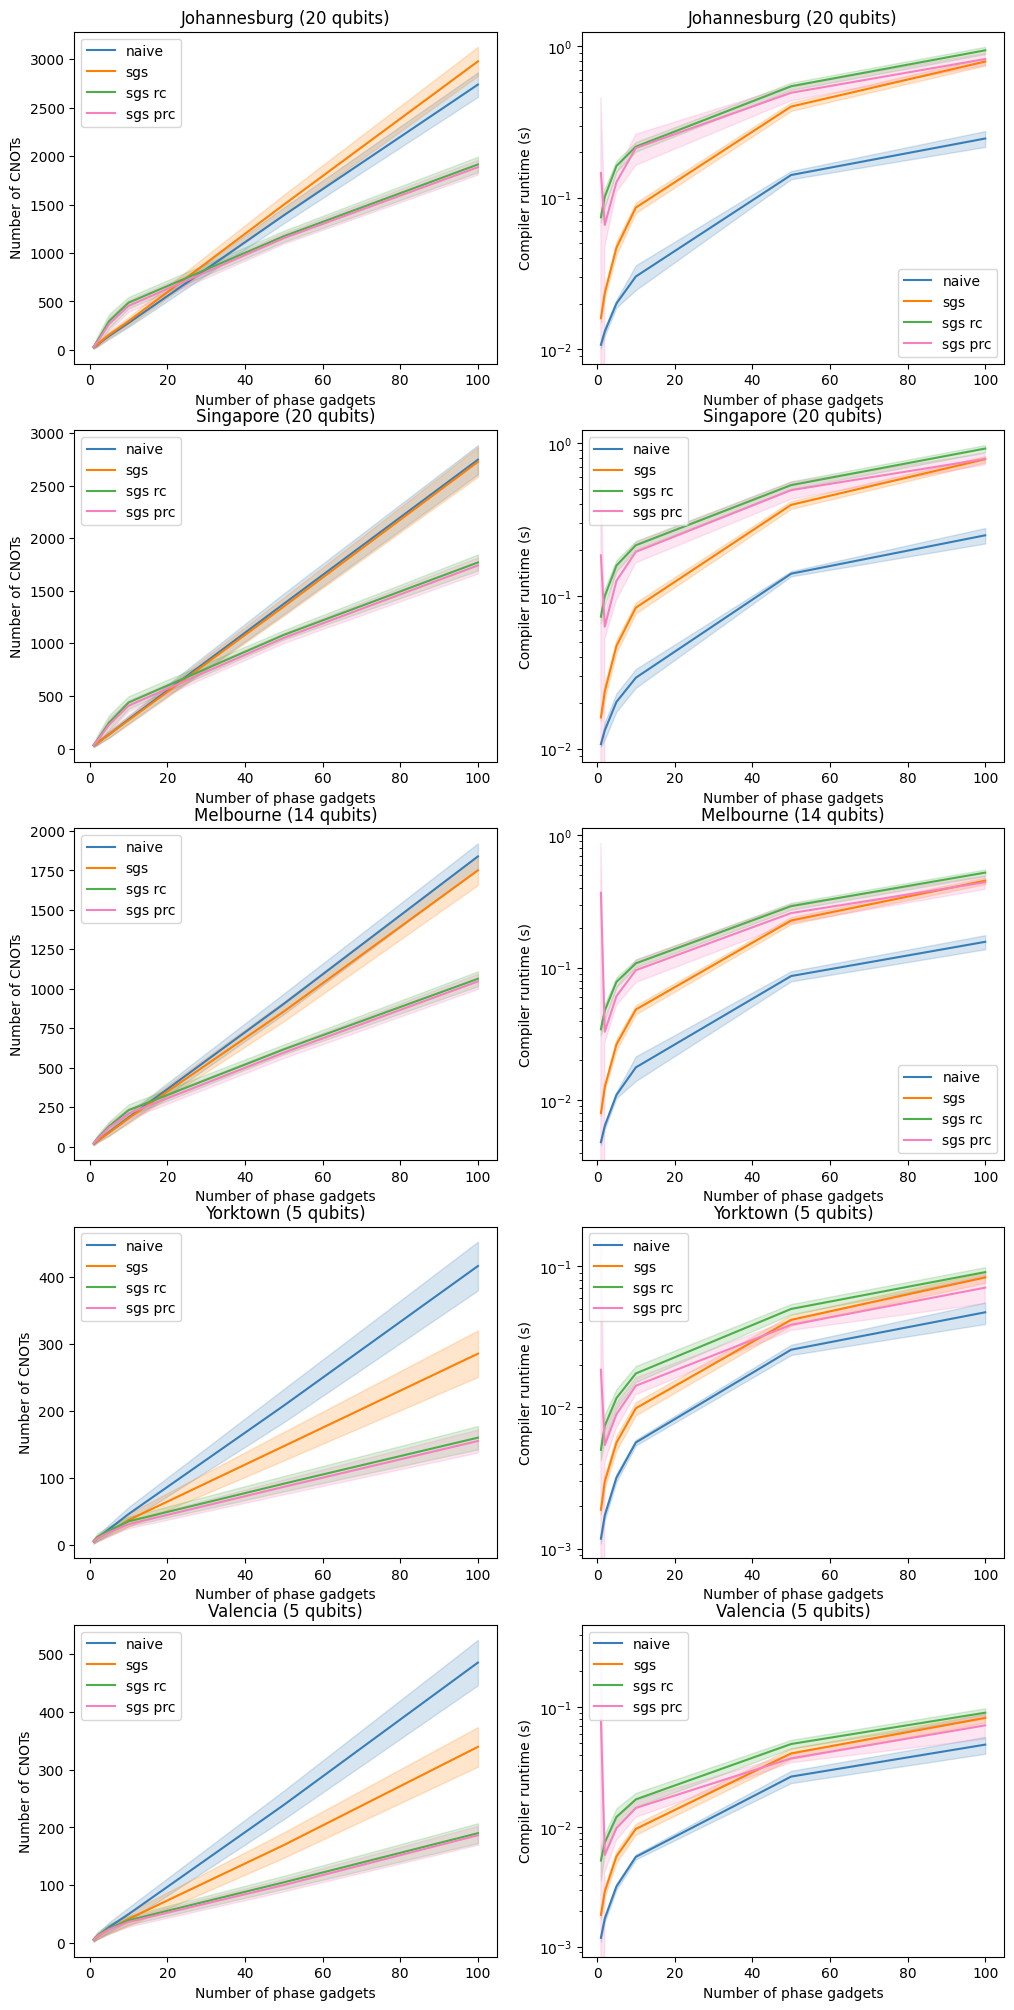

In [19]:
exp1 = [{
    #"original": "original",
    "naive": "naive+naive+False+RT",
    #"qiskit": "qiskit",
    #"tket": "tket",
    method: name+"+naive+False+RT",
    method+" rc": name+"+permrowcol+False+RT",
    method+" prc": "parity" if method == "ps" else "graysynth"
} for method, name in [("ps", "paritysynth"), ("sgs", "steiner-graysynth")]]
for exp in exp1:
    draw_results2(exp)

/var/folders/3q/vjbn2sl16r1g41lg5pk752khfzf5fm/T/ipykernel_54816/3594802256.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/3q/vjbn2sl16r1g41lg5pk752khfzf5fm/T/ipykernel_54816/3594802256.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


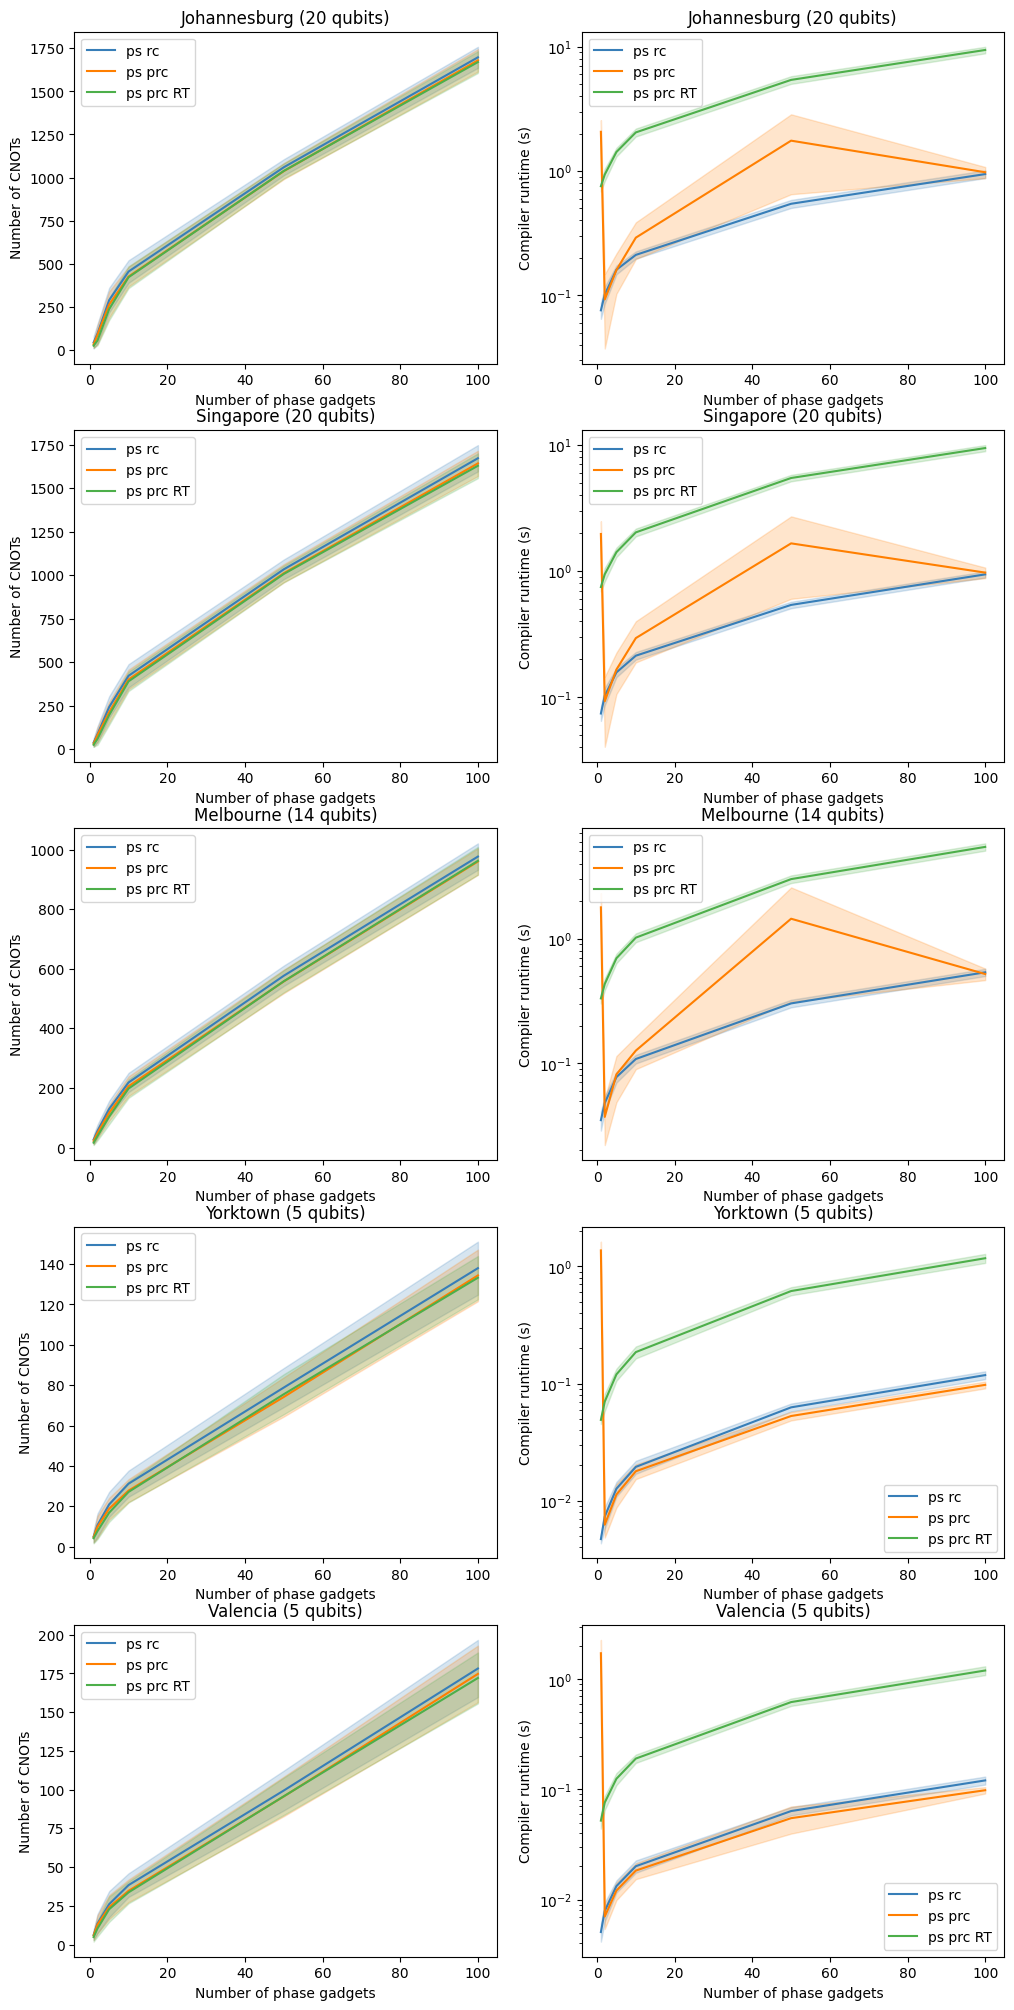

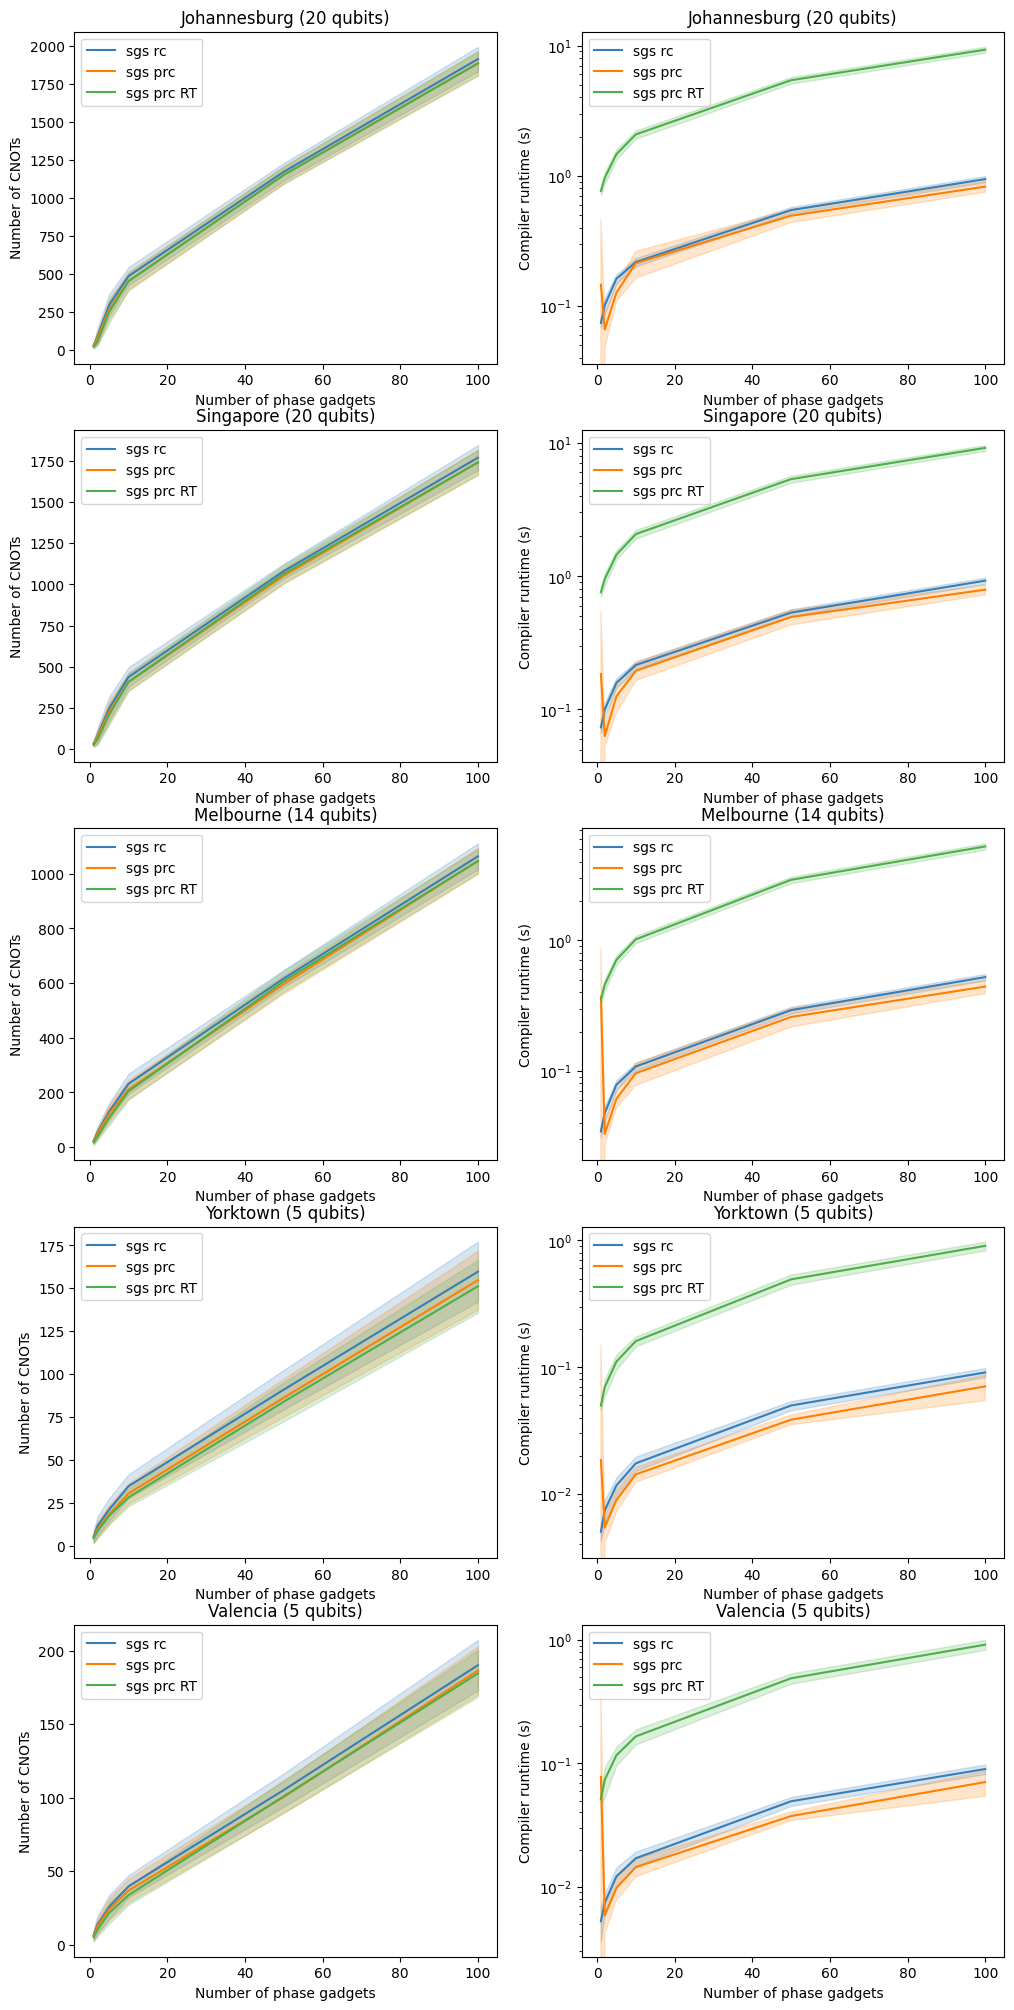

In [41]:
exp2 = [{
    #"original": "original",
    #"naive": "naive+naive+False+RT",
    #"qiskit": "qiskit",
    #"tket": "tket",
    #method: name+"+naive+False+RT",
    method+" rc": name+"+permrowcol+False+RT",
    method+" prc": "parity" if method == "ps" else "graysynth",
    method+" prc RT": name+"+permrowcol+True+RT"
} for method, name in [("ps", "paritysynth"), ("sgs", "steiner-graysynth")]]
for exp in exp2:
    draw_results2(exp)

/var/folders/3q/vjbn2sl16r1g41lg5pk752khfzf5fm/T/ipykernel_54816/3594802256.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/3q/vjbn2sl16r1g41lg5pk752khfzf5fm/T/ipykernel_54816/3594802256.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/3q/vjbn2sl16r1g41lg5pk752khfzf5fm/T/ipykernel_54816/3594802256.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


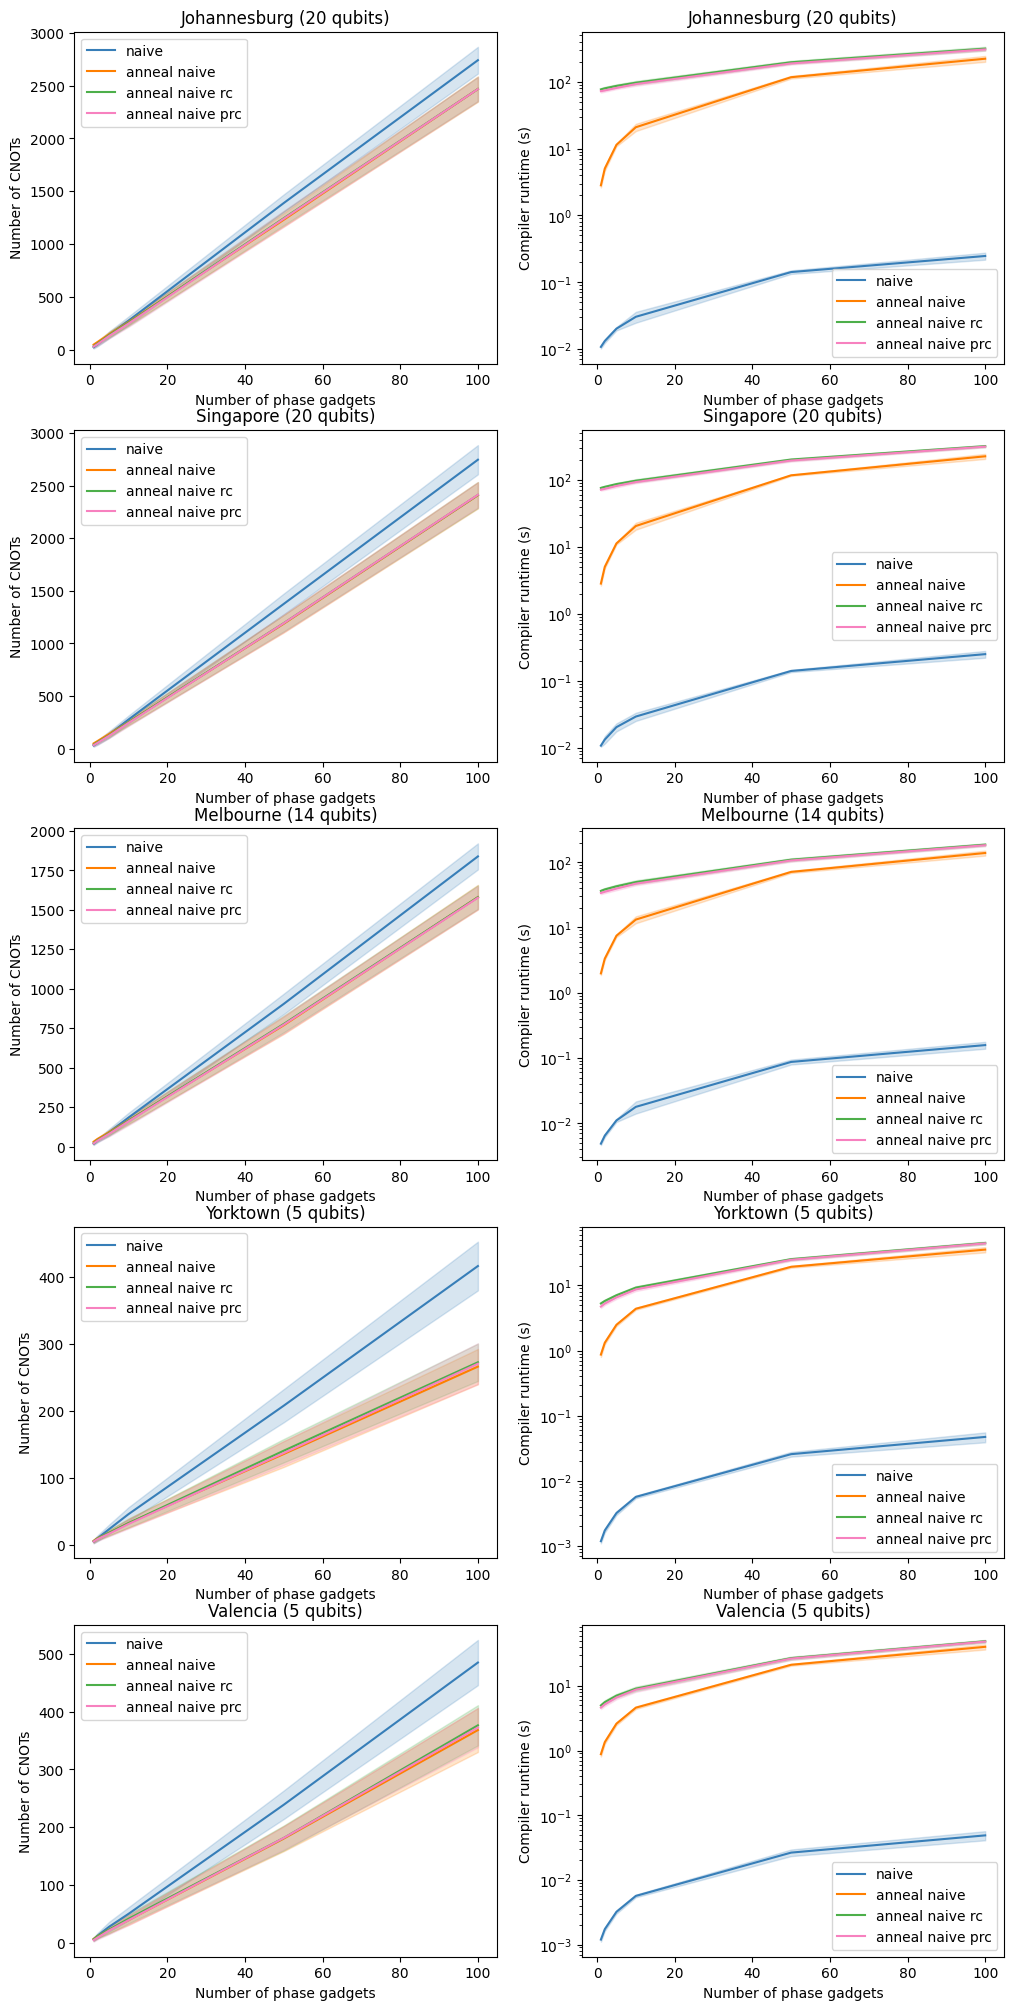

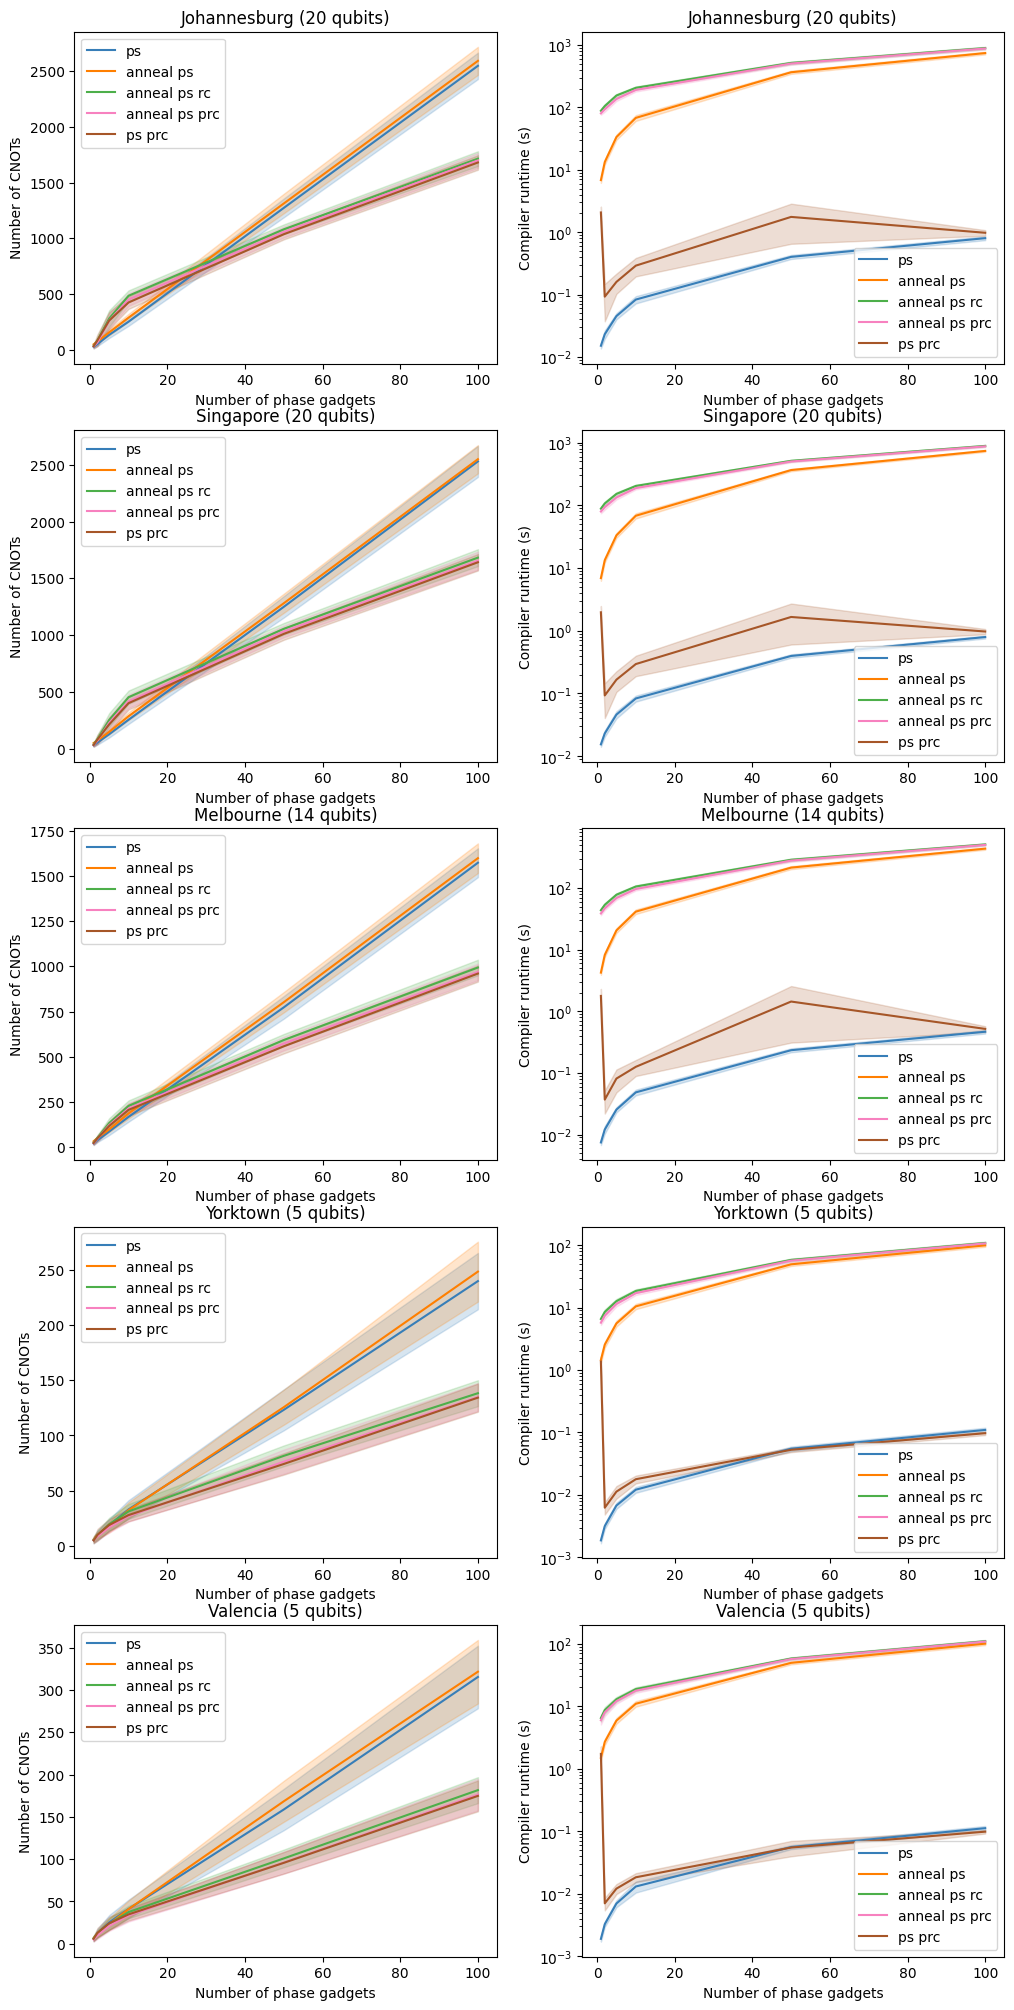

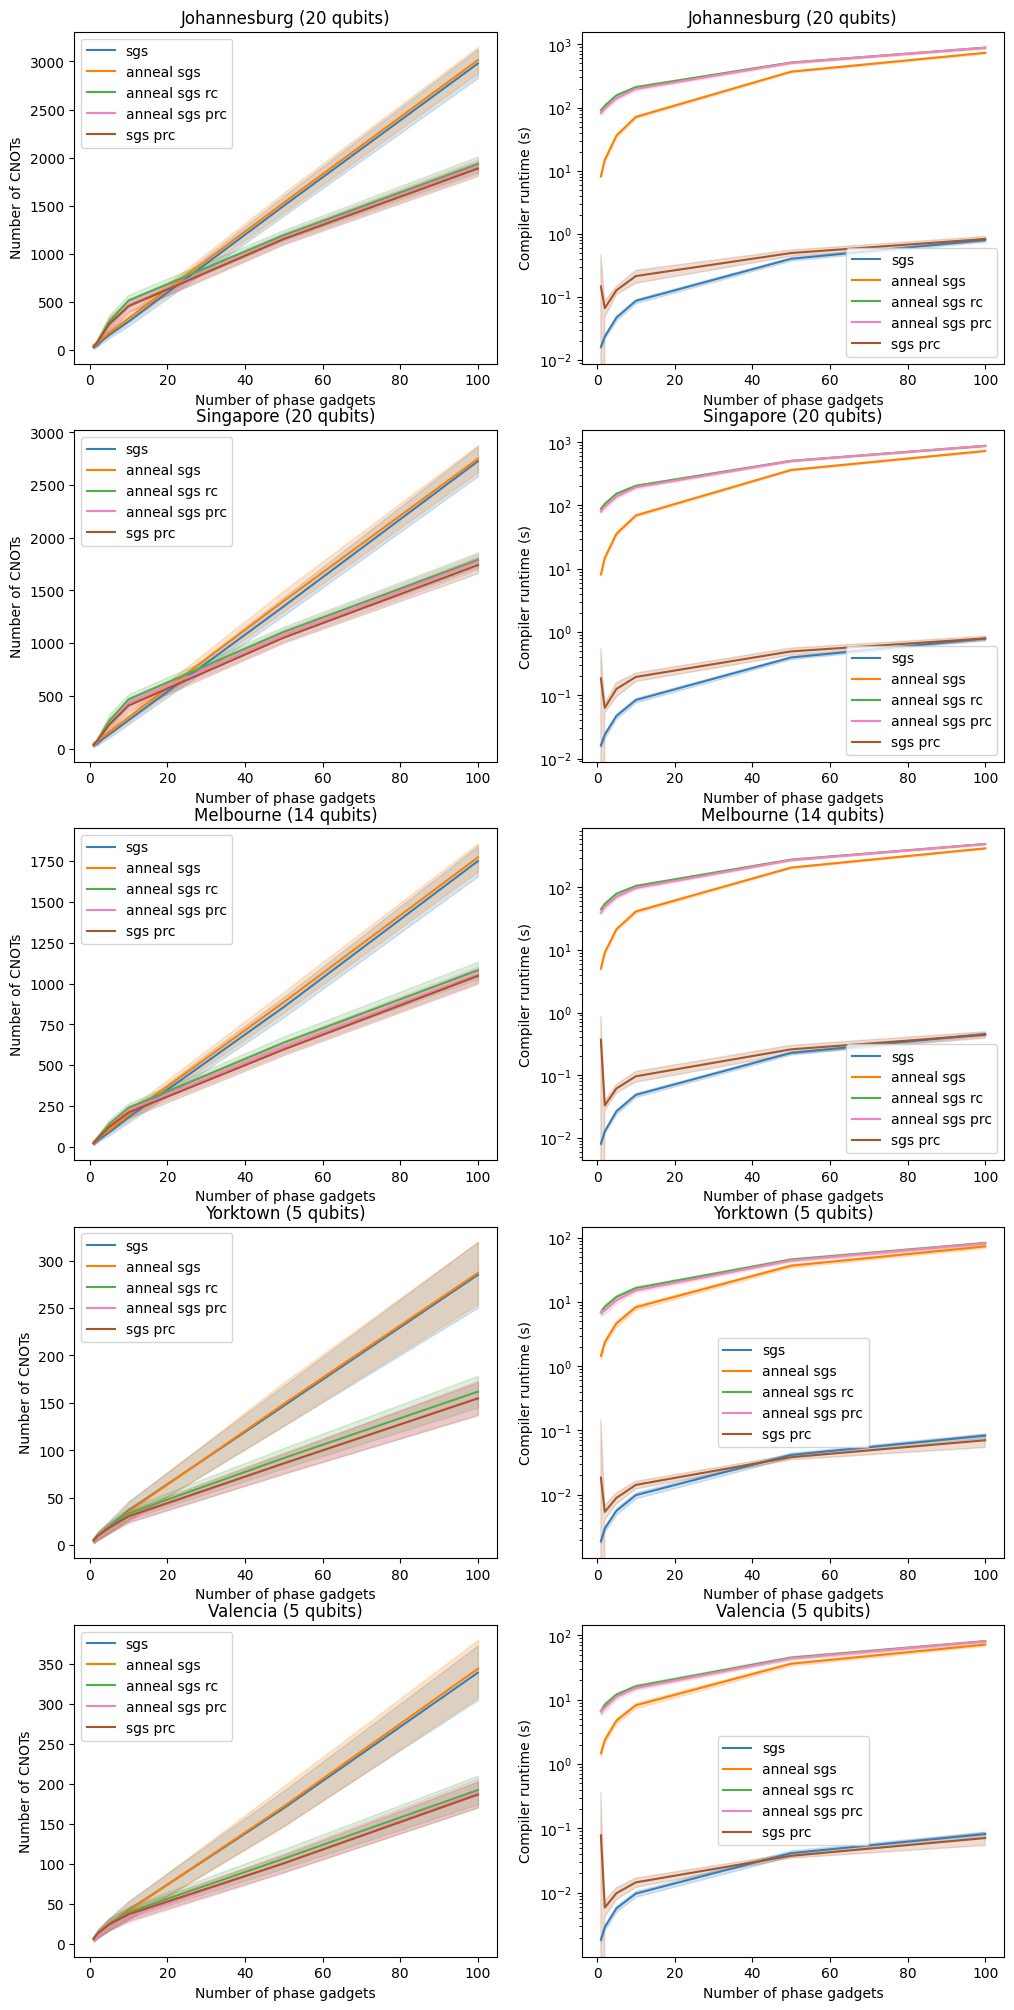

In [42]:
exp3 = [{
    #"original": "original",
    #"naive": "naive+naive+False+RT",
    #"qiskit": "qiskit",
    #"tket": "tket",
    method: name+"+naive+False+RT",
    #method+" rc": name+"+permrowcol+False+RT",
    #method+" prc": "parity" if method == "ps" else "graysynth",
    "anneal "+method: name+"+naive+False+annealer",
    "anneal "+method+" rc": name+"+permrowcol+False+annealer",
    "anneal "+method+" prc": name+"+permrowcol+True+annealer"
} for method, name in [("naive", "naive"), ("ps", "paritysynth"), ("sgs", "steiner-graysynth")]]
exp3[1]["ps prc"] = "parity"
exp3[2]["sgs prc"] = "graysynth"
for exp in exp3:
    draw_results2(exp)

/var/folders/3q/vjbn2sl16r1g41lg5pk752khfzf5fm/T/ipykernel_54816/3594802256.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/3q/vjbn2sl16r1g41lg5pk752khfzf5fm/T/ipykernel_54816/3594802256.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/3q/vjbn2sl16r1g41lg5pk752khfzf5fm/T/ipykernel_54816/3594802256.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


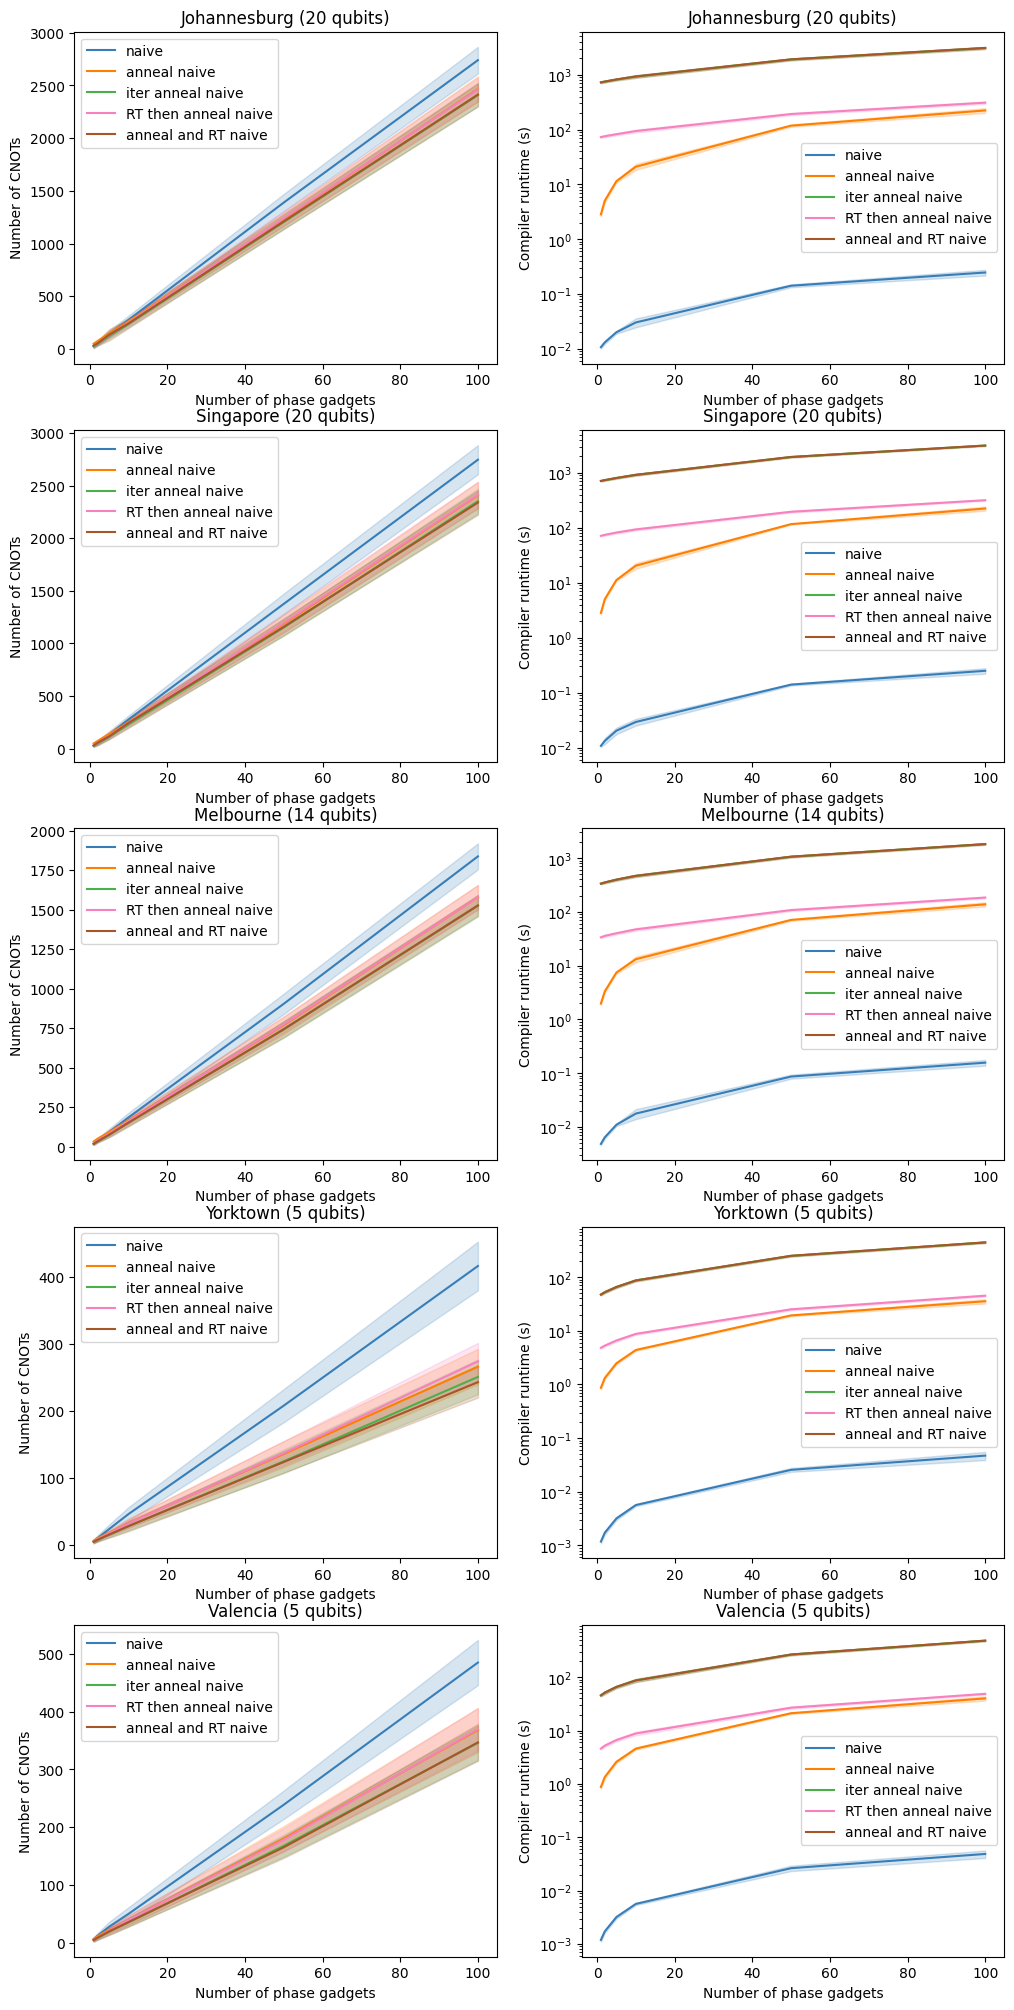

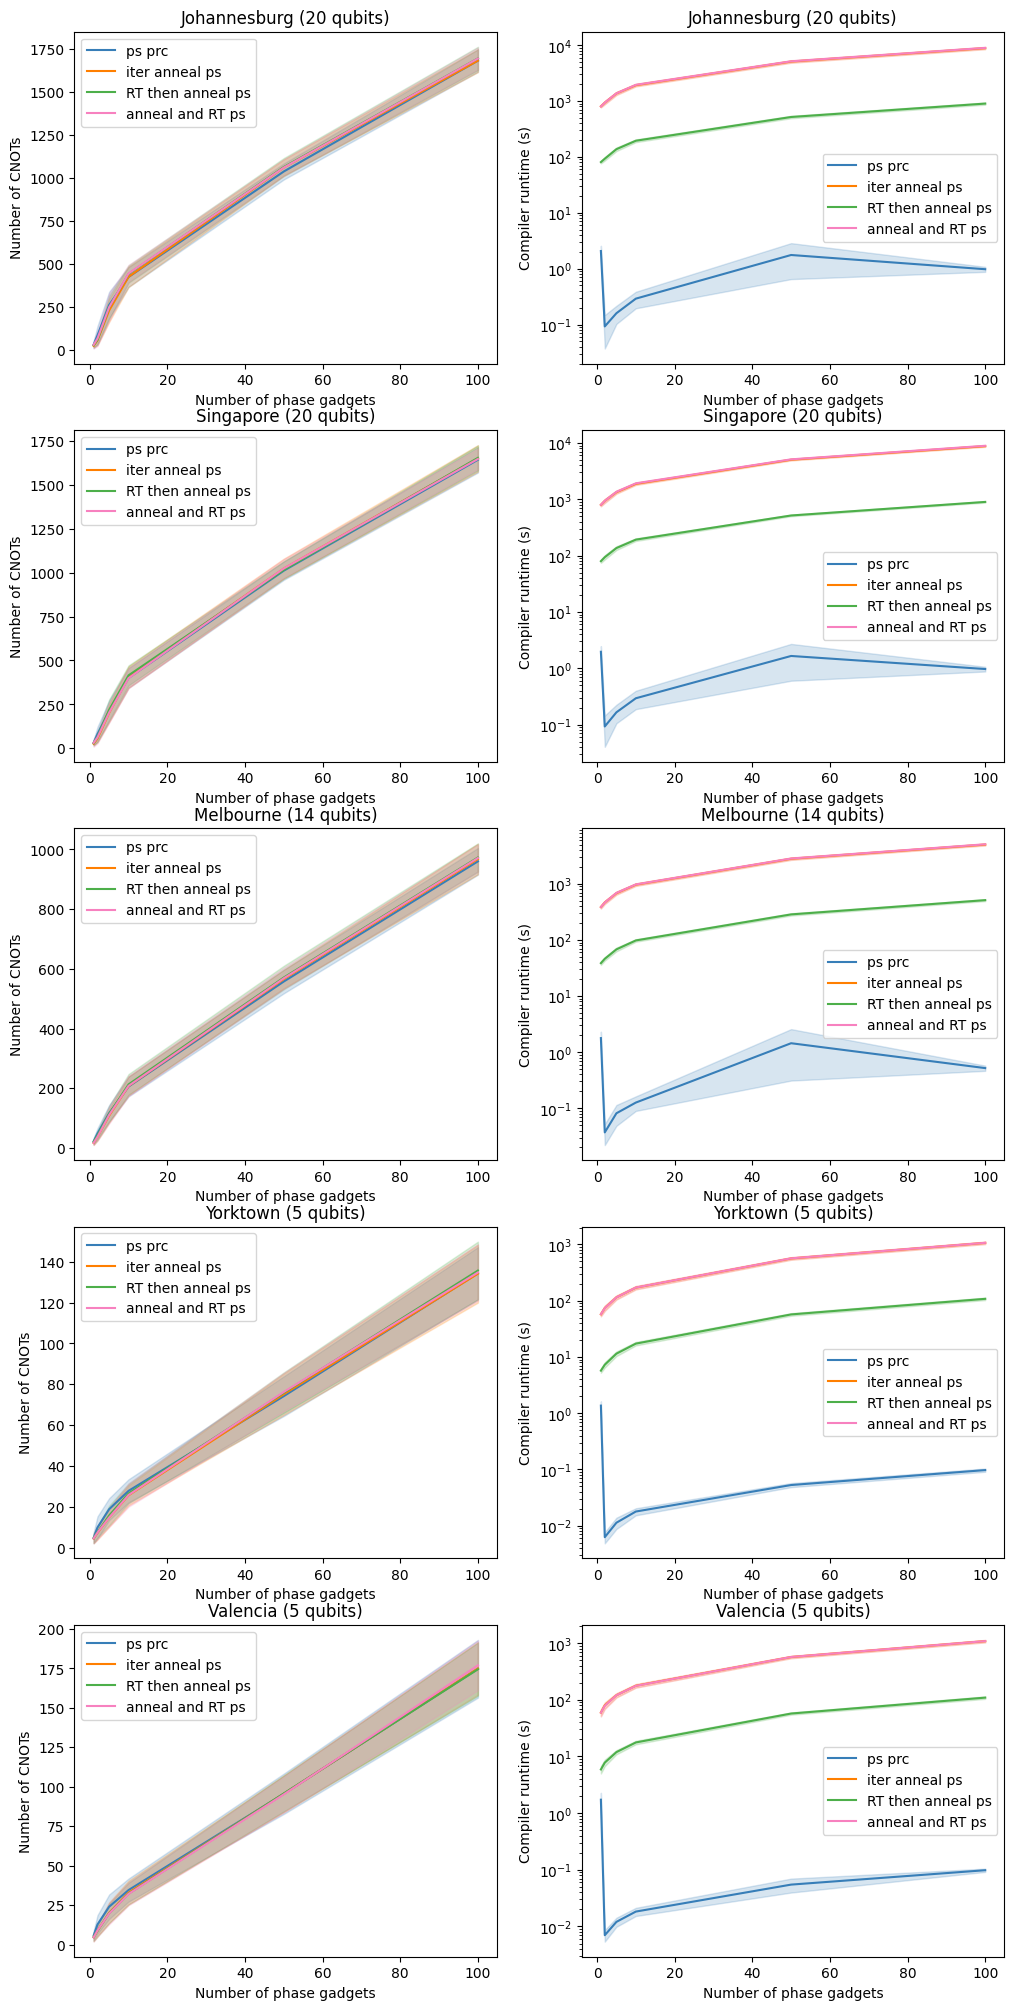

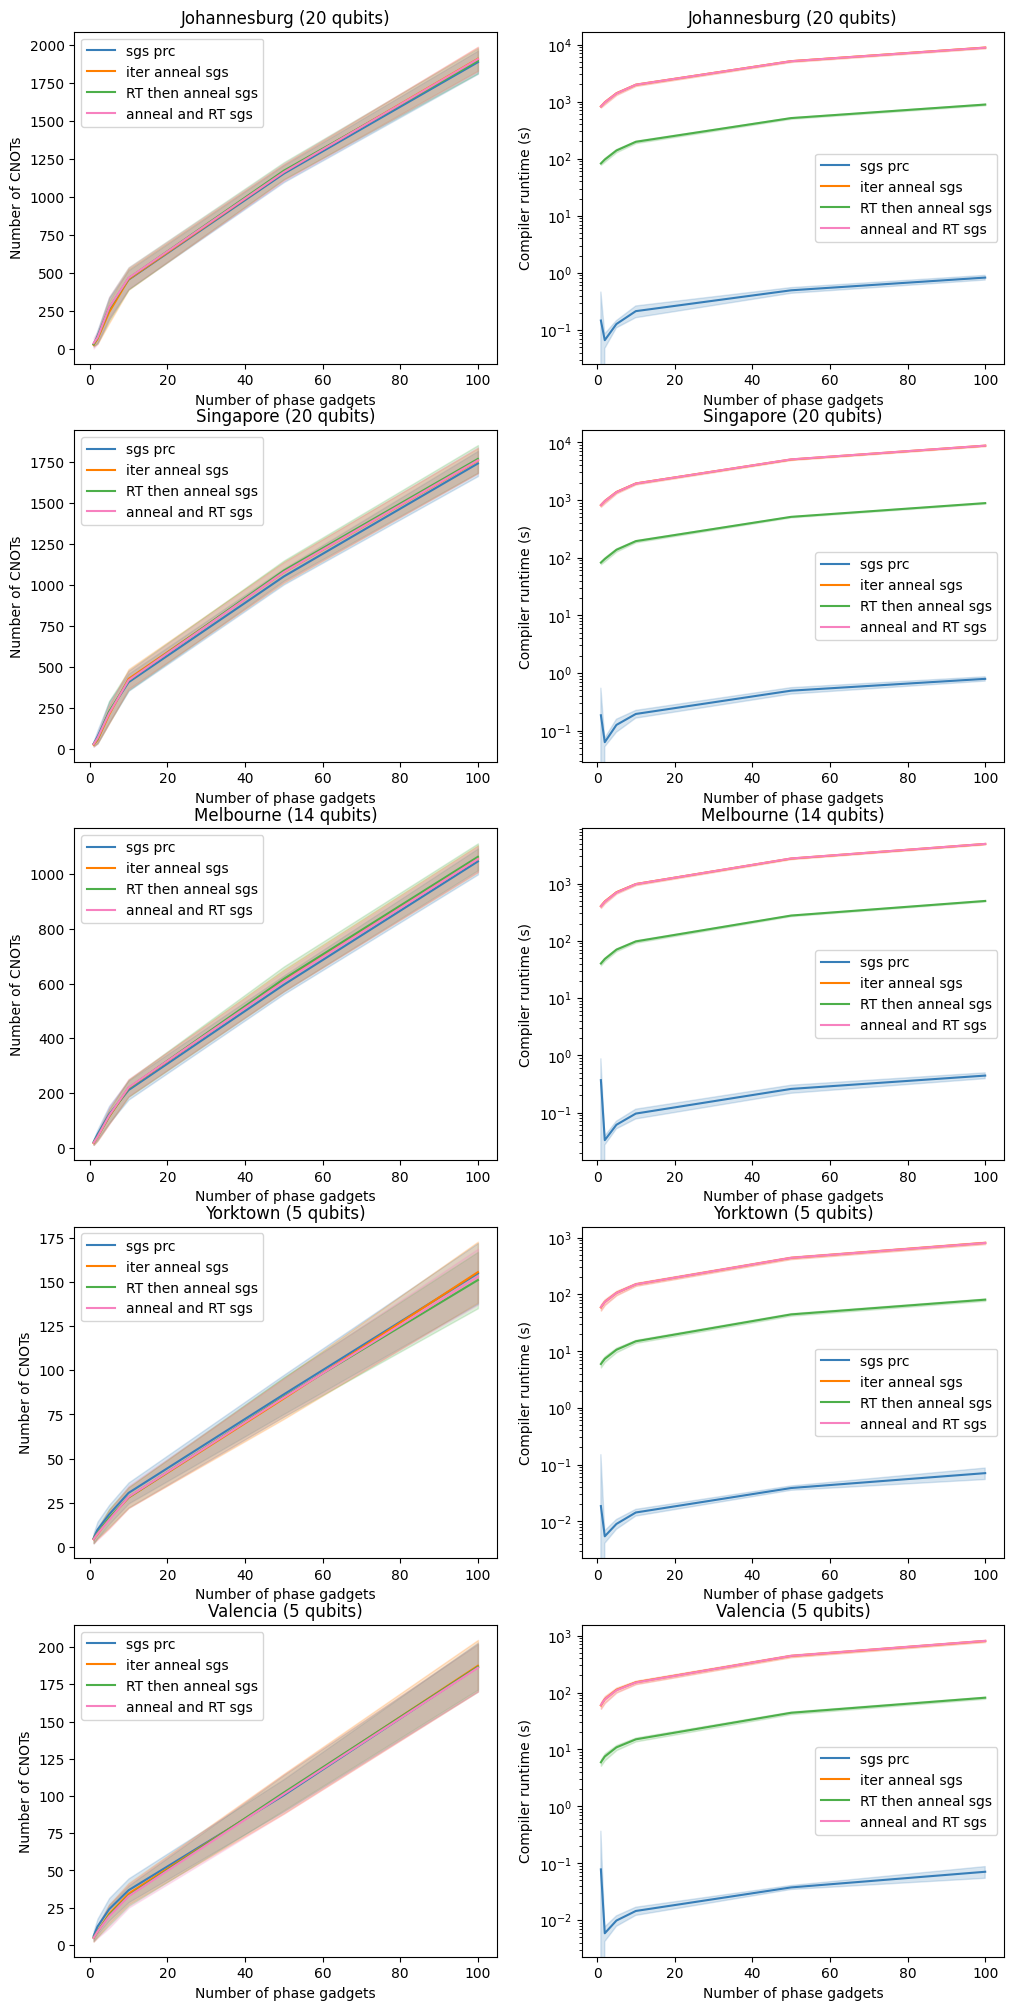

In [43]:
exp4 = [{
    #"original": "original",
    #"naive": "naive+naive+False+RT",
    #"qiskit": "qiskit",
    #"tket": "tket",
    #method: name+"+naive+False+RT",
    #method+" rc": name+"+permrowcol+False+RT",
    #method+" prc": "parity" if method == "ps" else "graysynth",
    "iter anneal "+method: name+"+permrowcol+True+iter_anneal",
    "RT then anneal "+method: name+"+permrowcol+True+RT->anneal",
    "anneal and RT "+method: name+"+permrowcol+True+RT*anneal",
} for method, name in [("naive", "naive"), ("ps", "paritysynth"), ("sgs", "steiner-graysynth")]]
extra = [{}, {}, {}]
extra[0]["naive"] = "naive+naive+False+RT"
extra[0]["anneal naive"]= "naive+naive+False+annealer"
extra[1]["ps prc"] = "parity"
extra[2]["sgs prc"] = "graysynth"
for i, exp in enumerate(exp4):
    extra[i].update(exp)
    draw_results2(extra[i])